In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
%matplotlib inline

In [22]:
df =pd.read_csv('athlete_events.csv')
df_noc=pd.read_csv('noc_regions.csv')
df.head()
 

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [23]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [24]:
df.NOC.nunique()

230

In [32]:
df_noc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [6]:
"""import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
pd.set_option("max_rows", None)
df[df.Team=="Thessalonki-1"]
df_noc[df_noc.NOC=="GRE"]
df[df.NOC=="GRE"].Team"""

'import sys\nimport numpy\nnumpy.set_printoptions(threshold=sys.maxsize)\npd.set_option("max_rows", None)\ndf[df.Team=="Thessalonki-1"]\ndf_noc[df_noc.NOC=="GRE"]\ndf[df.NOC=="GRE"].Team'

In [26]:
df=pd.merge(df_noc,df,on='NOC',how='inner')

In [36]:
non_region=df_noc[df_noc.region.isna()].query('NOC!="UNK"')
non_region

,NOC,region,notes
168,ROT,NaN,Refugee Olympic Team
208,TUV,NaN,Tuvalu


In [9]:
df.drop('Games',axis=1,inplace=True)

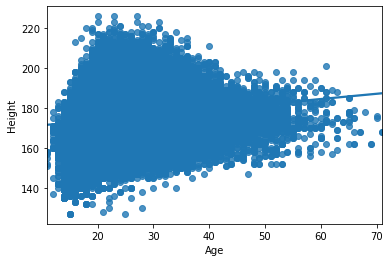

In [10]:
sb.regplot(data=df,y='Height',x='Age')
 

In [11]:
df.describe().columns

Index(['ID', 'Age', 'Height', 'Weight', 'Year'], dtype='object')

In [12]:
col=['Age', 'Height', 'Weight']
g=sb.PairGrid(data=df,x_vars=col,y_vars=col)
g.map_diag(plt.hist,bins=50)
g.map_offdiag(sb.regplot,line_kws={'color':'red'})


Error in callback <function flush_figures at 0x7fa25a1fd670> (for post_execute):


KeyboardInterrupt: 

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

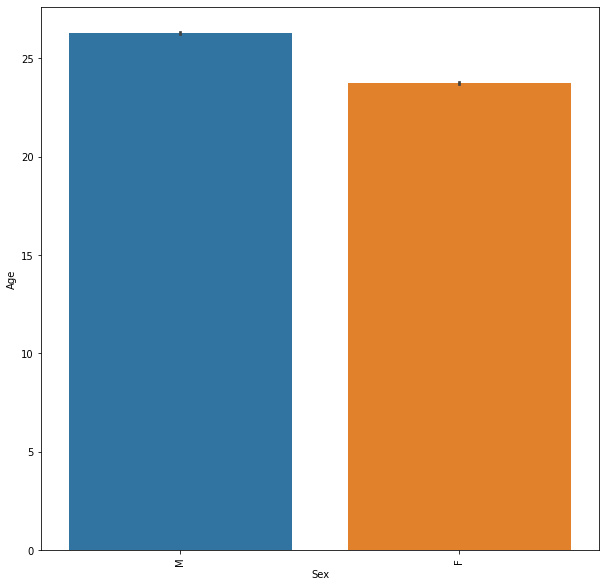

In [13]:
plt.figure(figsize=(10,10))
sb.barplot(data=df,x='Sex',y='Age')
plt.xticks(rotation=90)

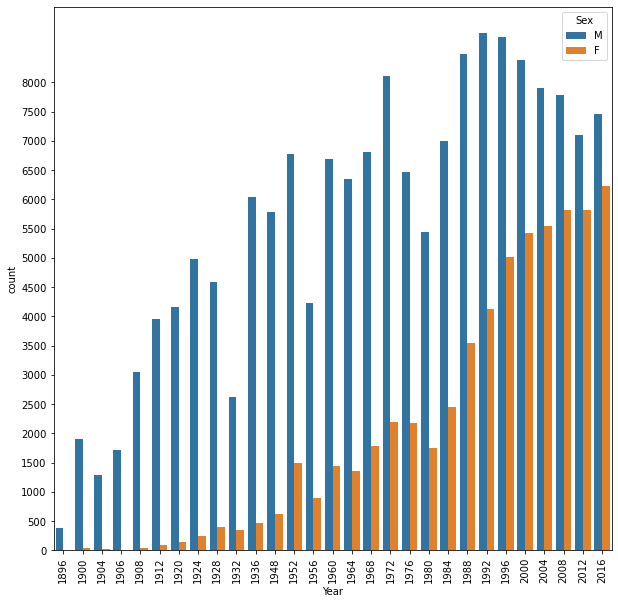

In [14]:
plt.figure(figsize=(10,10))
sb.countplot(data=df[df.Season=='Summer'],x='Year',hue='Sex')
plt.xticks(rotation=90);
t=np.arange(0,8000+500,500);
plt.yticks(t,t);

In [15]:
df[df.Year==2010].Season.unique()

array(['Winter'], dtype=object)

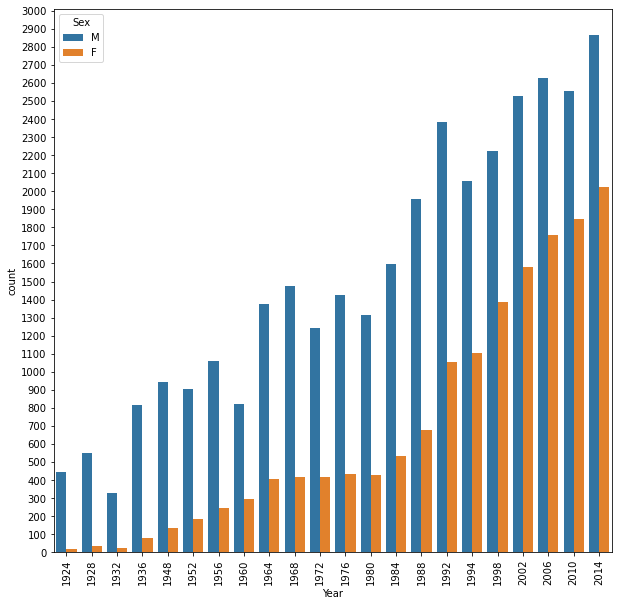

In [16]:
plt.figure(figsize=(10,10))
sb.countplot(data=df[df.Season=='Winter'],x='Year',hue='Sex',hue_order=['M','F'])
plt.xticks(rotation=90);
t=np.arange(0,3000+100,100);
plt.yticks(t,t);

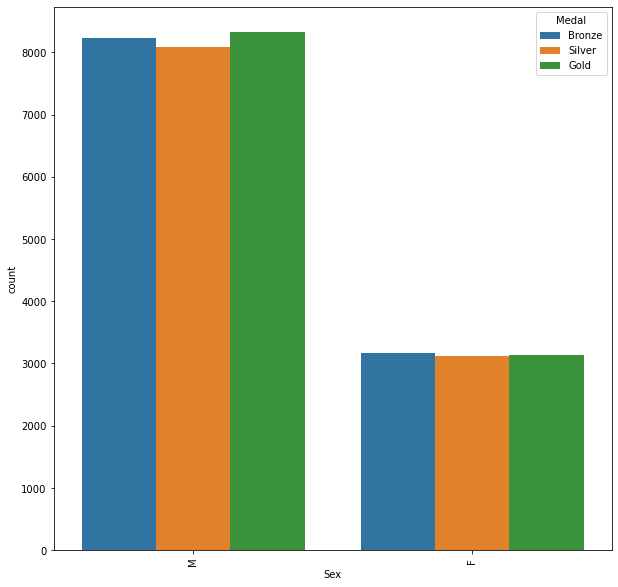

In [17]:
plt.figure(figsize=(10,10))
sb.countplot(data=df[df.Season=='Summer'],x='Sex',hue='Medal')
plt.xticks(rotation=90);


/home/hussien-elkholy/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


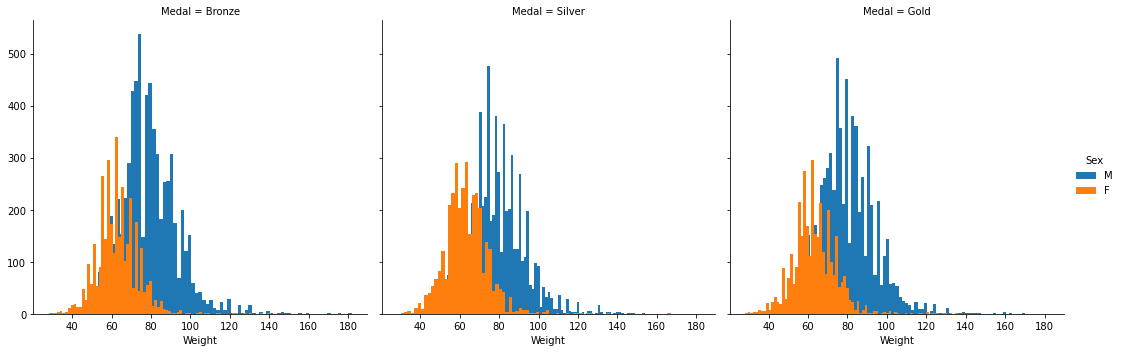

In [52]:
g=sb.FacetGrid(data=df,col='Medal',hue='Sex',size=5,legend_out=True)
g.map(plt.hist,'Weight',bins=80).add_legend();



In [19]:
df.query('Sport=="Swimming"').

SyntaxError: invalid syntax (<ipython-input-19-74501e27d223>, line 1)

In [ ]:
sb.lmplot(data=df,x='Weight',y='Age',hue='Sex',scatter_kws={'alpha':0.5})

In [ ]:
cor=df.drop(['Year','ID'],axis=1).corr()
sb.heatmap(cor,fmt='.2f',annot=True)

In [ ]:
plt.figure(figsize=(15,10))
sb.countplot(data=df,x='Sport',order=df.groupby('Sport').count().ID.sort_values().index)
plt.xticks(rotation=90)


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

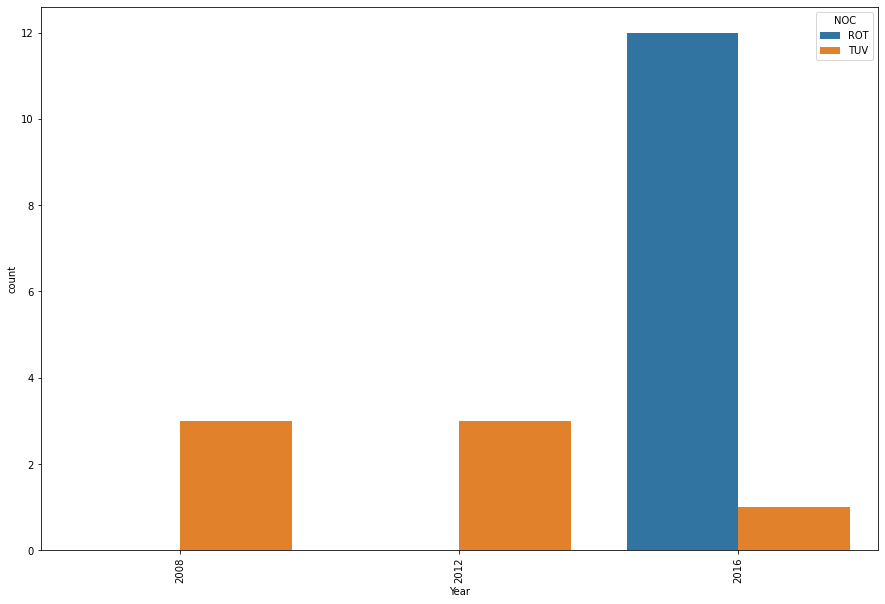

In [49]:
plt.figure(figsize=(15,10))
data=df.query('NOC == "ROT" or NOC=="TUV"')
sb.countplot(data=data,x='Year',hue="NOC")
plt.xticks(rotation=90)


In [53]:
data.Medal.nunique()

0

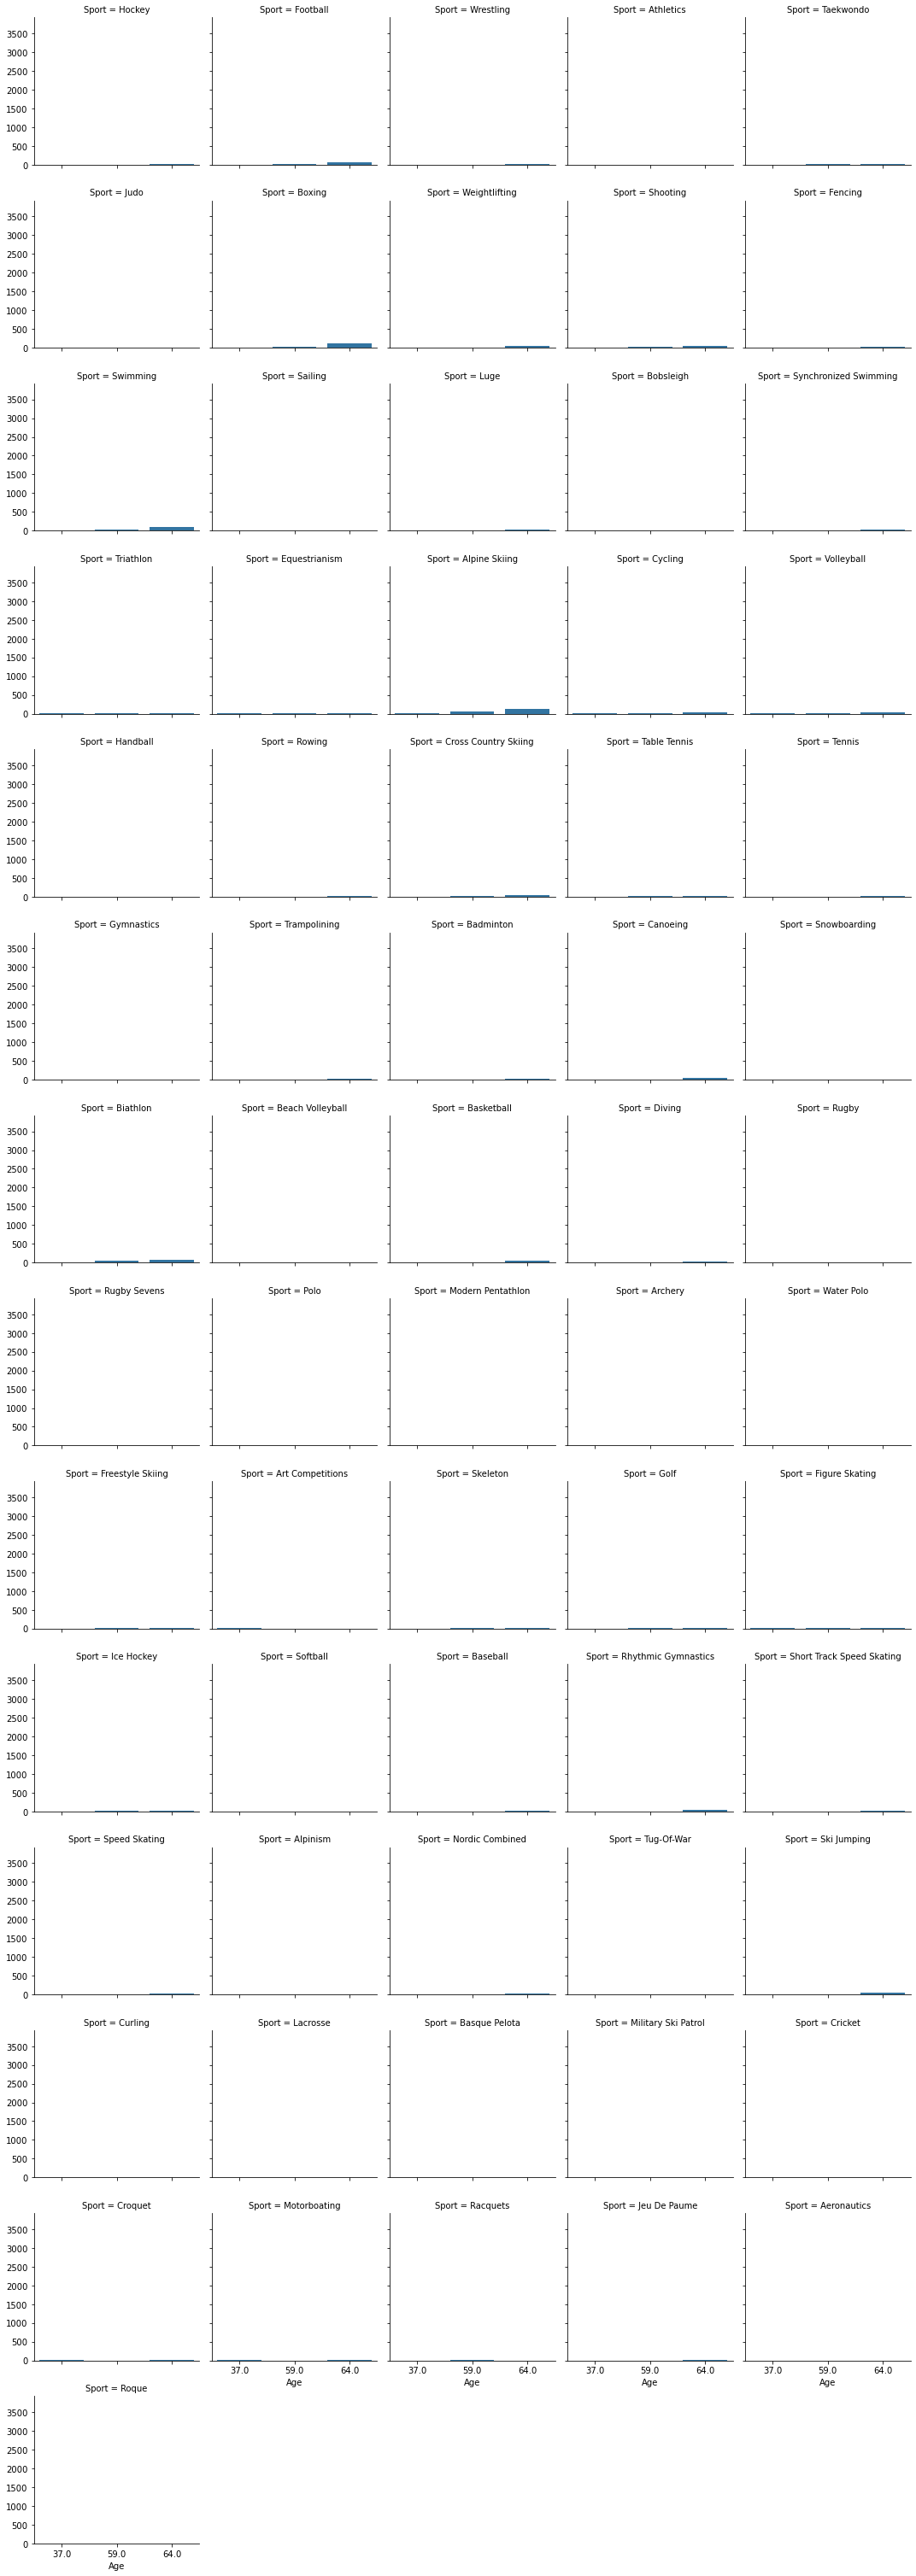

In [55]:
g=sb.FacetGrid(data=df,col='Sport',col_wrap=5)
g.map(sb.countplot,'Age')